# Generate and Visualise some Lorenz-63 data

In [5]:
from pathlib import Path
import sys
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Add src folder to Python path
sys.path.append(str(Path("../src").resolve()))

from data_generation import generate_data


In [4]:
data = generate_data(10000, noise_level=0, time_step=0.01)

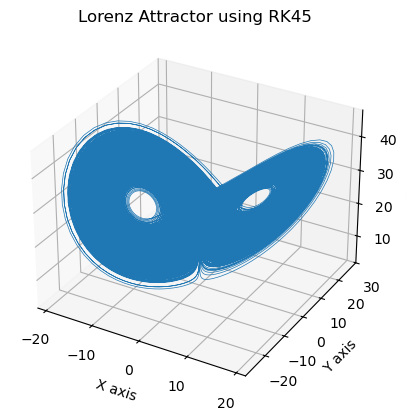

In [17]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(data[:,0], data[:,1], data[:,2], lw=0.5)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('Lorenz Attractor using RK45')
plt.show()

In [18]:
data2 = generate_data(100000, noise_level=0, time_step=0.01)

NameError: name 'data2' is not defined

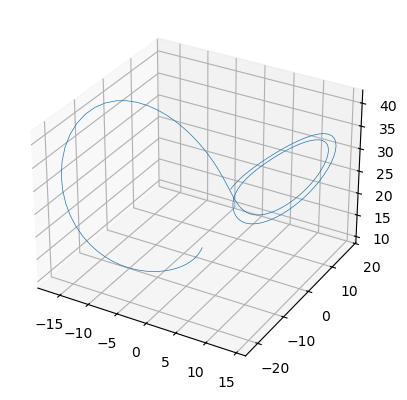

In [59]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(data[-200:,0], data[-200:,1], data[-200:,2], lw=0.5)

ax.plot(data2[-200:, 0],data2[-200:, 1],data2[-200:, 2], lw=0.5, color='orange')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('Lorenz Attractor with perturbed initialisation')
plt.show()

In [37]:
from pathlib import Path

FIGURES = Path("../figures/lorenz63")
FIGURES.mkdir(parents=True, exist_ok=True)

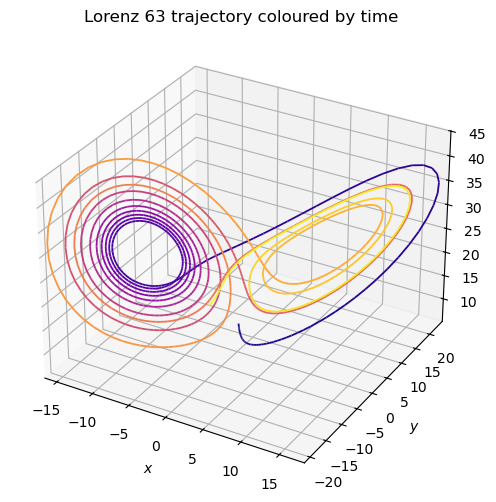

In [ ]:
data = generate_data(1100, noise_level=0, time_step=0.01)

# data: (n, 3)
x, y, z = data.T
t = np.arange(len(data))   # or your actual time array

# Build line segments
points = data.reshape(-1, 1, 3)
segments= np.concatenate([points[:-1], points[1:]], axis=1)

# Colour normalisation
norm = Normalize(t.min(), t.max())
lc = Line3DCollection(segments, cmap="plasma", norm=norm)
lc.set_array(t)
lc.set_linewidth(1.3)

# Plot
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")
ax.add_collection(lc)

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(z.min(), z.max())

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title("Lorenz 63 trajectory coloured by time")


# cbar = plt.colorbar(lc, ax=ax, pad=0.1)
# cbar.set_label("Time")
fig.savefig(FIGURES / "time_series_gradient.png", dpi=300, bbox_inches="tight")
plt.close(fig)  # important!
plt.show()


In [50]:
data = generate_data(1000, noise_level=0, time_step=0.01)

In [85]:
init = data[-1,]
init_peturb = init + 0.2

In [86]:
data1 = generate_data(1000, noise_level=0, time_step=0.01, init=init, trunc=False)
data2 = generate_data(1000, noise_level=0, time_step=0.01, init=init_peturb, trunc=False)

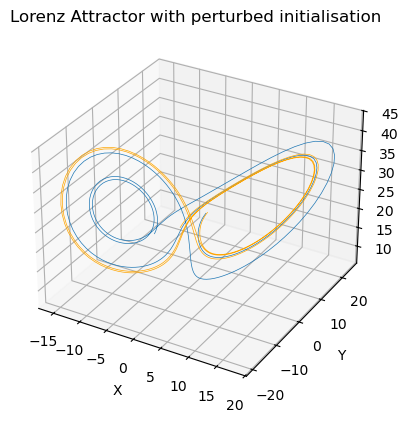

In [87]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(data1[:400,0], data1[:400,1], data1[:400,2], lw=0.5)

ax.plot(data2[:400, 0],data2[:400, 1],data2[:400, 2], lw=0.5, color='orange')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Lorenz Attractor with perturbed initialisation')
plt.show()